<a href="https://colab.research.google.com/github/yes-ee/deep-learning/blob/main/ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

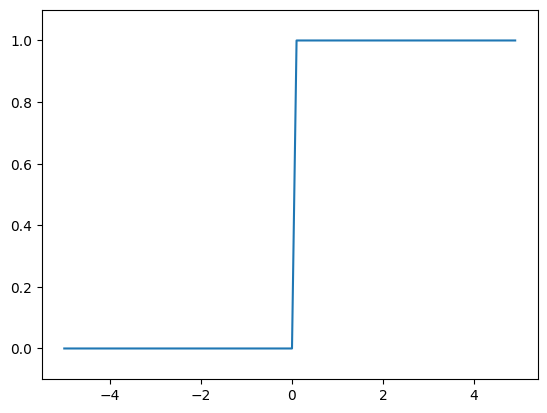

In [22]:
import numpy as np
import matplotlib.pylab as plt

# 계단 함수의 그래프
def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

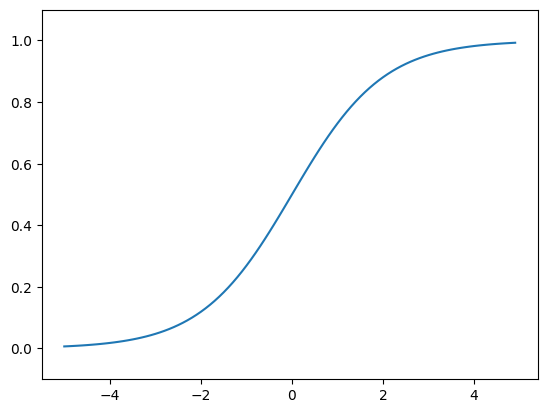

In [23]:
# 시그모이드 함수의 그래프
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

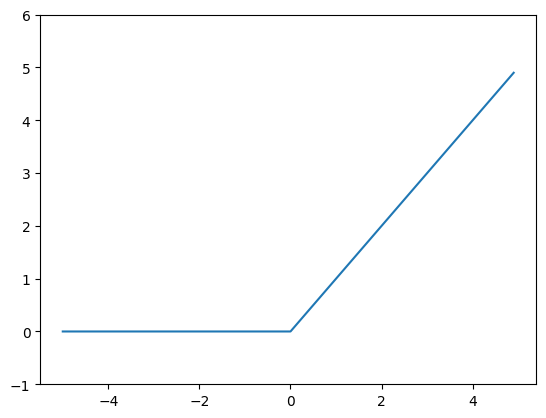

In [24]:
# ReLU 함수의 그래프
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 6)
plt.show()

In [25]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)

C = np.dot(A, B)
print(C.shape)
print(C)

(3, 2)
(2,)
(3,)
[23 53 83]


In [26]:
# 3층 신경망 구현
def identify_function(x):
  return x

# 가중치, 편향 초기화
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # x1 -> a, x2 -> a
  network['b1'] = np.array([0.1, 0.2, 0.3]) # b -> a
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # a1 -> a(2층) a2, a3
  network['b2'] = np.array([0.1, 0.2]) # b -> a(2층)
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # a1 -> y1, a2 -> y2
  network['b3'] = np.array([0.1, 0.2]) # b -> y

  return network

# 입력 신호를 출력 신호로 변환
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identify_function(a3)

  return y

network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [27]:
# 소프트맥스 함수 구현
def softmax(a):
  c = np.max(a) # 오버플로를 막기 위해 최댓값 지정
  exp_a = np.exp(a - c) # 오버플로 방지
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

# 소프트맥스 함수의 출력값은 0~1 사이
# 출력값의 총합은 1
# -> 소프트맥스 함수의 출력을 확률로 해석할 수 있음

[0.01821127 0.24519181 0.73659691]
1.0
